# Heart Disease Prediction
   ### Debasish Chandra Dey
   ### Reg. No.: 12114879
   ### Roll no.: 52
   ### Sec.: K21UR

# Introduction

## The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

# Domain Knowledge

### sex: Binary variable indicating gender (1 for male, 0 for female).
### age: Age of the individual.
### education: Level of education (categorical).
### currentSmoker: Binary variable indicating if the individual is a current smoker (1 for yes, 0 for no).
### cigsPerDay: Number of cigarettes smoked per day.
### BPMeds: Binary variable indicating if the individual is on blood pressure medication (1 for yes, 0 for no).
### prevalentStroke: Binary variable indicating if the individual has had a prevalent stroke (1 for yes, 0 for no).
### prevalentHyp: Binary variable indicating if the individual has prevalent hypertension (1 for yes, 0 for no).
### diabetes: Binary variable indicating if the individual has diabetes (1 for yes, 0 for no).
### totChol: Total cholesterol level.
### sysBP: Systolic blood pressure.
### diaBP: Diastolic blood pressure.
### BMI: Body mass index.
### heartRate: Heart rate.
### glucose: Glucose level.
### TenYearCHD: Binary variable indicating if the individual developed coronary heart disease within the next ten years (1 for yes, 0 for no).

# Why the dataset was chosen ?

## With recent advancement in technology ,people are able to do tasks in just one click where at once it was tiresome. People are not physically active nowadays nor healthy yet they have better availabilty of good foods and access to all information one needs to keep one healthy.
## This dataset provides some specific criteria on which one can be judged that one might get Heart disease in recent future or not.
## Here I have applied different ML models by splitting the data in Train and Test set. This provides probability on features/ columns if He/ She might get heart disease.

In [1]:
import warnings
warnings.simplefilter('ignore')

# Importing all the neccessary Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


### Numpy for Linear Algebra
### Pandas for data processing, CSV file I/O
### Matplotlib for data visualization purposes
### Seaborn for statistical data visualization

In [3]:
df = pd.read_csv('framingham.csv') # Reading the dataset using pandas 

In [4]:
df.head() # print 5 rows as default

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## EDA

In [5]:
column_name_changes = {'currentSmoker': 'is_smoking', 'male': 'sex'} # changing the column names for Currentsmoker and maLe
df = df.rename(columns=column_name_changes)  

In [6]:
df.drop(['education'], inplace = True, axis = 1) # dropping the column education

In [7]:
df.head()

,sex,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.info() # provides the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   is_smoking       4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [9]:
df.shape # provies the shape of the dataset with format of rows and columns

(4240, 15)

In [10]:
df.describe() #provides the description of the dataframe

,sex,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
df.isnull().sum() # calculates the number of null values

sex                  0
age                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Calculating the percentage of missing values

In [12]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
        
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


## Dropping all the missing values

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum() # conformation if there is any missing values

sex                0
age                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
df.TenYearCHD.value_counts() # counting the values for 0's and 1's

0    3179
1     572
Name: TenYearCHD, dtype: int64

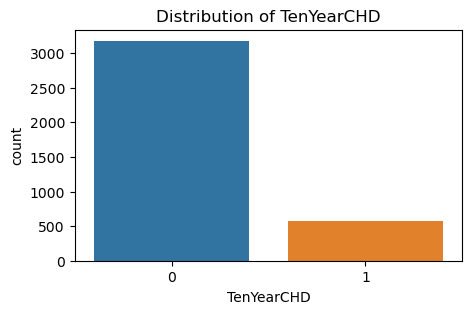

In [16]:
# Distribution of the target variable (TenYearCHD)
plt.figure(figsize=(5, 3))
plt.title('Distribution of TenYearCHD')
sns.countplot(x='TenYearCHD', data=df)

plt.show()

# Heatmap for correlation matrix

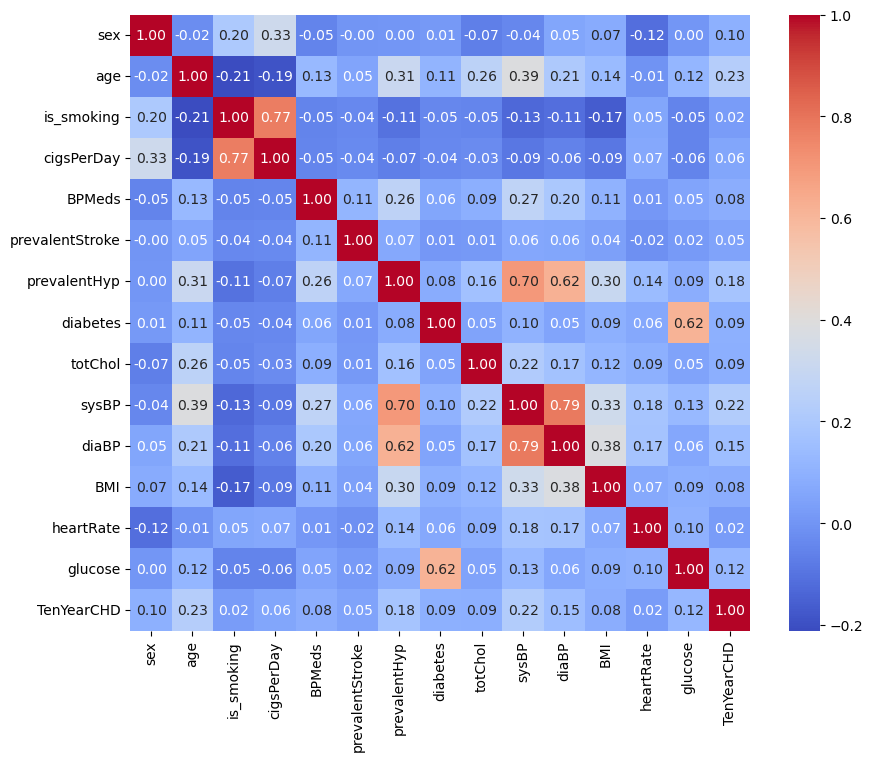

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm', fmt=".2f")
plt.show()

# Logistic Regression 

## Importing the necessary libaries

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Splitting the dataset in terms of independent and dependent variables

In [19]:
X = df[['age', 'sex', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = df['TenYearCHD'].values.reshape(-1,1)

In [20]:
y.shape

(3751, 1)

## Splitting the data in terms of Train set and Test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [22]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3000, 6) (3000, 1)
Test set: (751, 6) (751, 1)


## Creating the Logistic Regression Model

In [23]:
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make prediction on test dataset
y_pred = logreg.predict(X_test)

## Calculating the accuracy score 
   Accuracy score is used to evaluate the performance of the model.
   It is defined as the ratio of the number of correct predictions (both true positives and true negatives) to the total number    of predictions made

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.48%


## Creating a Confusion matrix 
 - A confusion matrix is a commonly used tool for evaluating the performance of classification models. It is a table that       summarizes how well a model is performing by comparing the actual class labels (ground truth) with the predicted class labels from the model.

<AxesSubplot:>

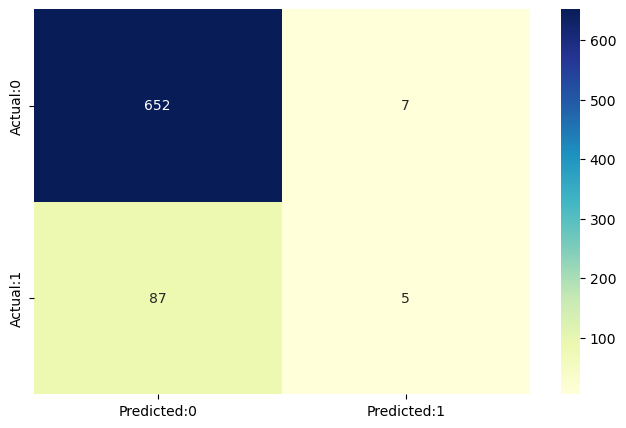

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# SVM

## Importing the necessary libaries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

## Splitting the dataset in terms of independent and dependent variables

In [27]:
X = df[['age', 'sex', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = df['TenYearCHD'].values.reshape(-1,1)

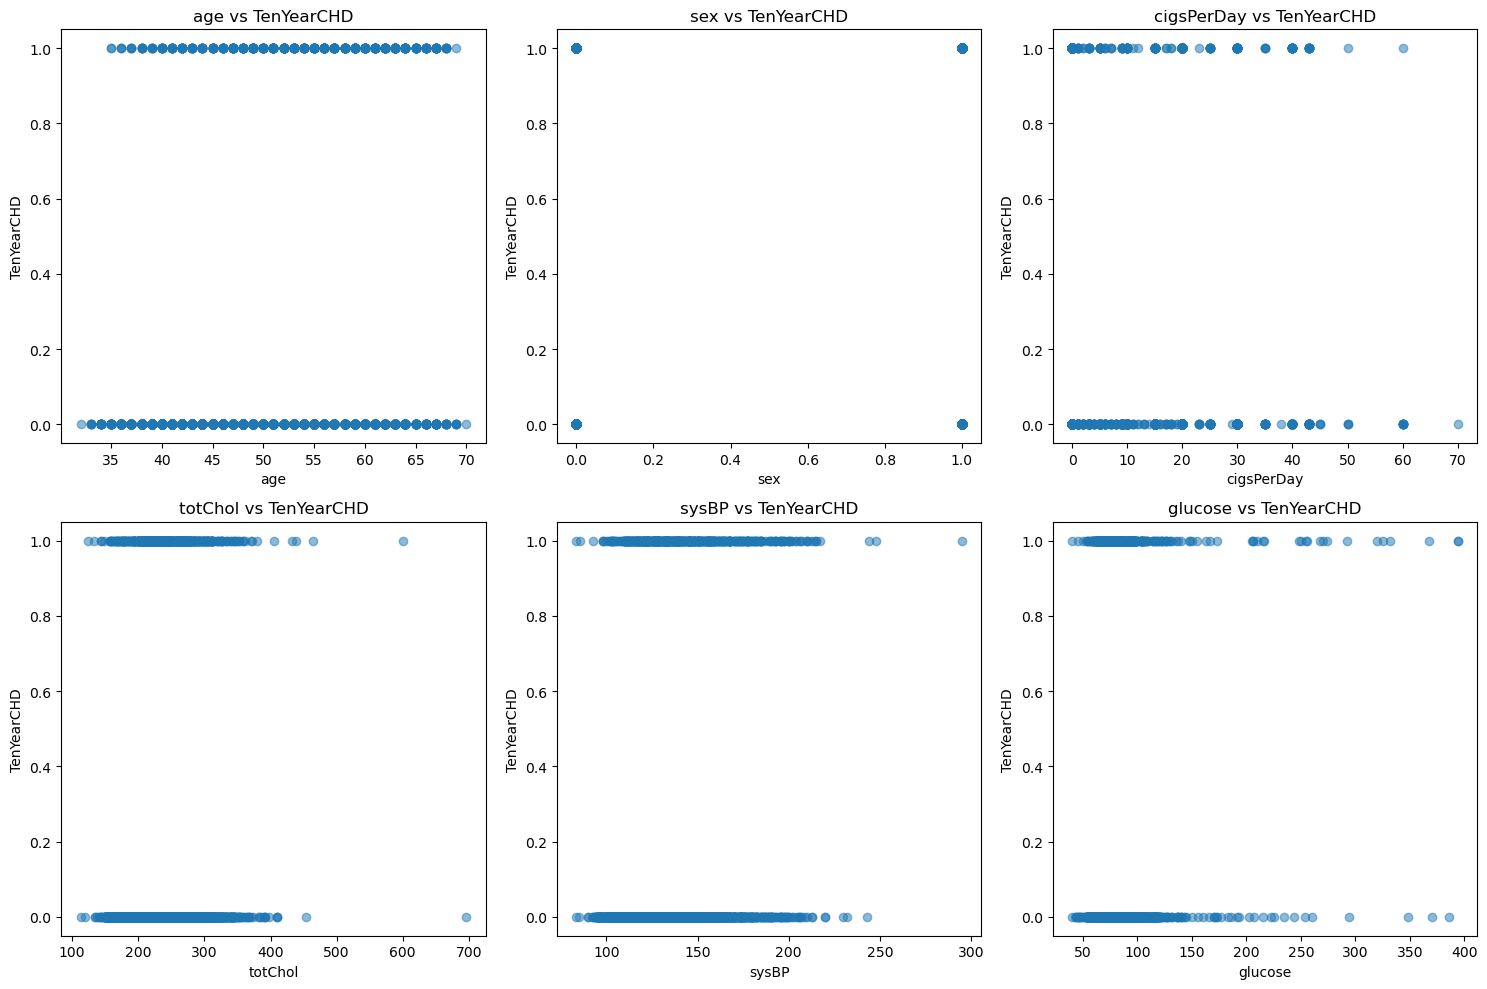

In [28]:
# Create scatter plots for each feature in X against y
features = X.columns
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a grid
    plt.scatter(X[feature], y, alpha=0.5)
    plt.title(f"{feature} vs TenYearCHD")
    plt.xlabel(feature)
    plt.ylabel('TenYearCHD')

plt.tight_layout()
plt.show()

## Splitting the data in terms of Train set and Test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling to normalize the feature data

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create the SVM model with a linear kernel

In [31]:
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

## Evaluate the model

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with linear kernel: {accuracy * 100:.2f}%")

Accuracy with linear kernel: 82.82%


<AxesSubplot:>

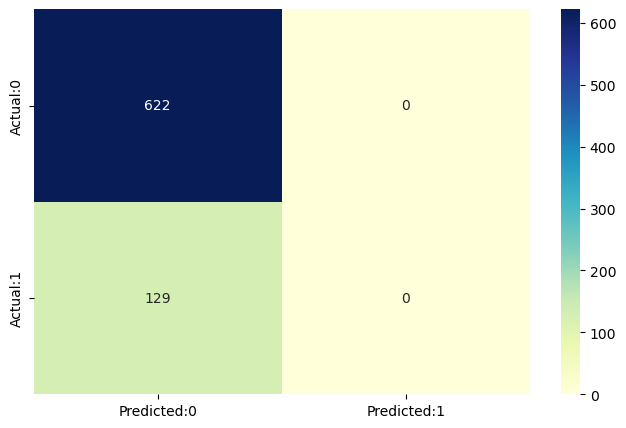

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## SVM with rbf(Radial Basis Function) kernel

In [34]:
# Initialize and train the model with RBF kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train.ravel())

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RBF kernel: {accuracy * 100:.2f}%")


Accuracy with RBF kernel: 83.36%


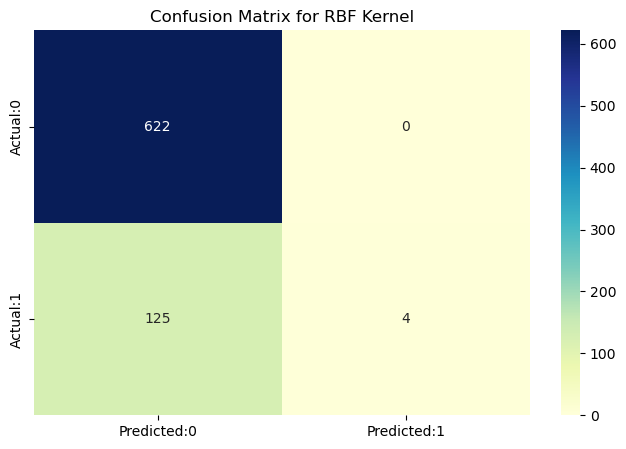

In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix for RBF Kernel')
plt.show()

# Hyperparameter Tuning the SVC (rbf)

In [36]:

from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
               'C' : [0.1,1,10,100,1000],
               'gamma': [1,0.1,0.01,0.001,0.0001],
               'kernel':['rbf'] 
    
}

In [38]:
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=5, verbose=3)

In [39]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.852 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.852 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.852 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.772 total time=   0.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.768 total time=   0.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.767 total time=   0.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.760 total time=   0.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.840 total time=   5.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.840 total time=   4.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.847 total time=   5.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.843 total time=   3.8s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.825 total time=   3.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.852 total time=   4.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.855 total time=   2.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.860 total time=   6.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [41]:
from sklearn.metrics import classification_report
#prediction
y_pred1= grid.predict(X_test)
print(classification_report(y_pred1, y_test))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy with RBF kernel: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       742
           1       0.03      0.44      0.06         9

    accuracy                           0.83       751
   macro avg       0.51      0.64      0.48       751
weighted avg       0.98      0.83      0.89       751

Accuracy with RBF kernel: 82.69%


## SVM with sigmoid kernel 

In [42]:
# Initialize and train the model with sigmoid kernel
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train, y_train.ravel())

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Sigmoid kernel: {accuracy * 100:.2f}%")


Accuracy with Sigmoid kernel: 77.76%


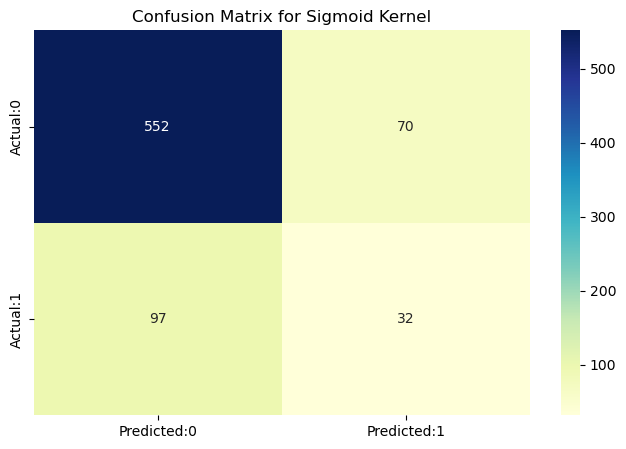

In [43]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix for Sigmoid Kernel')
plt.show()

# Conclusion

## Heart disease prediction model using the Framingham Heart Study dataset, a widely recognized dataset for cardiovascular research. We evaluated the performance of different machine learning algorithms, including Logistic Regression and Support Vector Machines (SVM) with various kernels (linear, RBF, and sigmoid).

## Our findings indicate that Logistic Regression achieved the highest accuracy of 87.48%, outperforming the SVM models. Among the SVM variants, the RBF kernel achieved an accuracy of 83.36%, followed closely by the linear kernel with 82.82%. The SVM with the sigmoid kernel had the lowest performance, achieving 77.76% accuracy.

## The superior performance of Logistic Regression suggests that a linear relationship between the input features and the target variable may be sufficient for this dataset, making it a straightforward and effective choice for heart disease prediction. While SVM models with different kernels can capture complex relationships, the relatively small gain in accuracy from the RBF and linear kernels compared to Logistic Regression indicates that these models may not add significant predictive power in this case.

# Acknowledgement

## While working in this dataset I have applied differnet ML models which helped to think as a Data science and ML students. This wouldn’t be possible without the guidance of my teacher, Sir Sajjad Manzoor Mir where he acted as a guiding torch and helped me in every difficulty I faced throughout this project. Thank you ma’am for providing me different ways to approach to an problem with some slight hints which would assure the success. 